### Analyzing the Stroop Effect


(1) What is the independent variable? What is the dependent variable?

#### Independent variable: color congruency 
#### Dependent variable:   time needed to end the experiment   

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.
**Null hypothese:** congruency doesn't affect the time needed to end the experiment
- H0: Ti-Tc = 0

**Alternative hypothese:** congruency affects the time needed to end the experiment
- H1: Ti-Tc ≠ 0

*Ti is the time needed to view incongruent words, Tc is the time needed to view congruent words 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

**to answer this question, describe function can provide the needed information**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import math
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

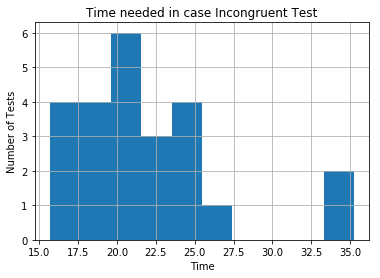

In [4]:
# plot histogram for Incongruent cases
df.Incongruent.hist()
plt.xlabel('Time')
plt.ylabel('Number of Tests')
plt.title('Time needed in case Incongruent Test');

The time needed to name the Incongruent words is between 16 to 27.5,  with a value of 33 to 35 as outliers.

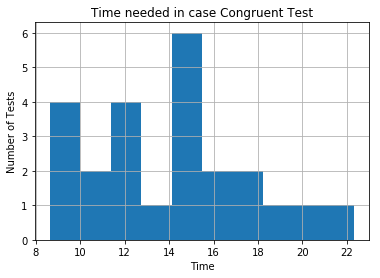

In [5]:
# plot histogram for Congruent cases
df.Congruent.hist()
plt.xlabel('Time')
plt.ylabel('Number of Tests')
plt.title('Time needed in case Congruent Test');

The time needed to name the Congruent words is between 9 to 22.5

C:\Users\hassn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


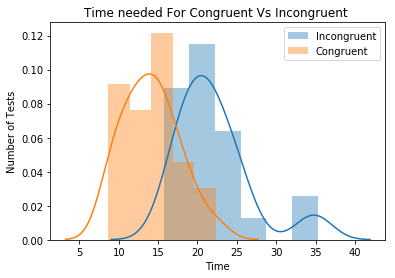

In [6]:
# compare the time needed in both cases 
sns.distplot(df['Incongruent'], label = 'Incongruent')
sns.distplot(df['Congruent'], label = 'Congruent')
plt.xlabel("Time");
plt.ylabel("Number of Tests");
plt.title("Time needed For Congruent Vs Incongruent ");
plt.legend();

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
len(df)

24

In [8]:
# Perform the statistical test here
# two tailed t_test, assuming the confidence level is 90% and d.f. is 23, t_critical = ±1.714 
df['difference'] = df['Incongruent']- df['Congruent']

In [9]:
df.head()

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [10]:
# to calculate the t-Value
# Standard deviation for the difference 
std_diff=df['difference'].std()
std_diff

4.864826910359056

In [11]:
# differenced mean
mean_diff= df['Incongruent'].mean() - df['Congruent'].mean()
mean_diff

7.964791666666665

In [12]:
t_value= mean_diff/(std_diff/math.sqrt(len(df)))
t_value

8.020706944109955

comparing the t_value with our t_critical as t_value > t_critical, we can reject the null hypothesis and accept the alternative hypothesis, which states that the time needed in case of Incongruent words is not the same in case of Congruent words.
The thing which I personally agree with, and which I expected when doing the experiement myself.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

According to the article https://imotions.com/blog/the-stroop-effect/:
"As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer."
That can explaine the extra time needed in analyzing Incongruent data. 
There are a lot of similar experiements, such as "Directional Stroop Effect", or "Number Stroop Effect" in the following links:
https://faculty.washington.edu/chudler/java/readyd.html
https://faculty.washington.edu/chudler/java/readyn.html